In [1]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\enric\Project Wrangling


In [1]:
#1 Analisis Sales
"""
Analisa Sales
Masalah
1) Perusahaan ingin mengetahui pertumbuhan penjualan hingga tahun 2018 bulan Agustus
2) Perusahaan ingin mengetahui kota manakah yang perlu diperhatikan untuk promosi produk agar sales meningkat
3) Perusahaan ingin mengetahui kota-kota dengan penjualan terbesar membeli produk dalam kategori apa saja agar fokus promosi ada
   pada produk-produk tersebut
"""

'\nAnalisa Sales\nMasalah\n1) Perusahaan ingin mengetahui pertumbuhan penjualan hingga tahun 2018 bulan Agustus\n2) Perusahaan ingin mengetahui kota manakah yang perlu diperhatikan untuk promosi produk agar sales meningkat\n3) Perusahaan ingin mengetahui kota-kota dengan penjualan terbesar membeli produk dalam kategori apa saja agar fokus promosi ada\n   pada produk-produk tersebut\n'

In [411]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import numpy as np
import warnings
from deep_translator import GoogleTranslator
warnings.simplefilter(action='ignore', category=FutureWarning)

<h3>Mengambil Dataset yang Dibutuhkan </h3>

In [412]:
#Menyambungkan ke database dan mengambil dataset yang diperlukan
conn = sqlite3.connect('olist.db')
query = """
SELECT * FROM olist_order_dataset
JOIN olist_order_payments_dataset USING(order_id)
JOIN olist_order_customer_dataset USING(customer_id)
JOIN olist_order_items_dataset USING(order_id)

"""
sales = pd.read_sql(query, conn)
sales.tail()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,...,customer_zip_code_prefix,customer_city,customer_state,index,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
117596,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,48750,...,11722,praia grande,SP,43826,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
117597,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,96280,...,45920,nova vicosa,BA,57884,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
117598,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1026,...,28685,japuiba,RJ,7844,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117599,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1026,...,28685,japuiba,RJ,7845,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117600,99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,76741,...,83750,lapa,PR,45266,1,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36


In [413]:
#Mengambil dataset dan menggabungkan dataset produk ke tabel sales
query = """
SELECT * 
FROM olist_products_dataset
"""
produk = pd.read_sql(query, conn)

#gabungkan tabel 3 ke tabel lokasi
sales_lokasi_produk = sales.merge(produk, on = 'product_id', how = 'inner')
sales_lokasi_produk.head()

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_x,...,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10770,...,8.72,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,44246,...,8.72,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,91130,...,8.72,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,25715,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,45269,...,7.78,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,26730,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,94871,...,7.78,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


<h3> Data Cleansing </h3>

In [414]:
# Mengetahui besarnya row dan melihat apakah ada null value
sales_lokasi_produk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        117601 non-null  int64  
 1   order_id                       117601 non-null  object 
 2   customer_id                    117601 non-null  object 
 3   order_status                   117601 non-null  object 
 4   order_purchase_timestamp       117601 non-null  object 
 5   order_approved_at              117586 non-null  object 
 6   order_delivered_carrier_date   116356 non-null  object 
 7   order_delivered_customer_date  115034 non-null  object 
 8   order_estimated_delivery_date  117601 non-null  object 
 9   index_x                        117601 non-null  int64  
 10  payment_sequential             117601 non-null  int64  
 11  payment_type                   117601 non-null  object 
 12  payment_installments          

In [415]:
#Deskriptif stat buat overview
sales_lokasi_produk.describe().T

,count,mean,std,min,25%,50%,75%,max
index_x,117601.0,49777.054498,28736.486375,0.00,24875.00,49739.00,74699.00,99440.00
index_x,117601.0,51940.446008,29976.828907,0.00,25994.00,51970.00,77864.00,103885.00
payment_sequential,117601.0,1.093528,0.726692,1.00,1.00,1.00,1.00,29.00
payment_installments,117601.0,2.939482,2.774223,0.00,1.00,2.00,4.00,24.00
payment_value,117601.0,172.686752,267.592290,0.00,60.87,108.21,189.26,13664.08
index_x,117601.0,49685.093707,28705.002840,0.00,24850.00,49688.00,74494.00,99440.00
customer_zip_code_prefix,117601.0,35051.793097,29820.588877,1003.00,11310.00,24315.00,58600.00,99990.00
index_x,117601.0,56283.715002,32533.301480,0.00,28116.00,56248.00,84498.00,112649.00
order_item_id,117601.0,1.195900,0.697706,1.00,1.00,1.00,1.00,21.00
price,117601.0,120.824783,184.479323,0.85,39.90,74.90,134.90,6735.00


In [416]:
#Memilih kolom yang kita butuhkan saja
column_used = ["order_id", "customer_id", "order_status",
               "order_purchase_timestamp", "order_delivered_carrier_date",
               "payment_type", "payment_installments", "payment_value",
               "customer_city", "customer_state", "order_item_id",
               "product_id", "product_category_name"]

sales_filtered = sales_lokasi_produk[column_used]
sales_filtered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,payment_type,payment_installments,payment_value,customer_city,customer_state,order_item_id,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,credit_card,1,18.12,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,voucher,1,2.00,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,voucher,1,18.59,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades_domesticas
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-17 15:28:33,credit_card,3,37.77,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades_domesticas
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-04 17:35:43,credit_card,1,37.77,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades_domesticas


<h4>Menyesuaikan tipe data dengan deskripsi kolom</h4>

In [417]:
# Mengubah tipe data tanggal
sales_filtered['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'], yearfirst=True)
sales_filtered['order_delivered_carrier_date'] = pd.to_datetime(sales['order_delivered_carrier_date'], yearfirst=True)

C:\Users\enric\AppData\Local\Temp\ipykernel_19652\2519499575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_filtered['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'], yearfirst=True)
C:\Users\enric\AppData\Local\Temp\ipykernel_19652\2519499575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_filtered['order_delivered_carrier_date'] = pd.to_datetime(sales['order_delivered_carrier_date'], yearfirst=True)


In [418]:
sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      117601 non-null  object        
 1   customer_id                   117601 non-null  object        
 2   order_status                  117601 non-null  object        
 3   order_purchase_timestamp      117601 non-null  datetime64[ns]
 4   order_delivered_carrier_date  116356 non-null  datetime64[ns]
 5   payment_type                  117601 non-null  object        
 6   payment_installments          117601 non-null  int64         
 7   payment_value                 117601 non-null  float64       
 8   customer_city                 117601 non-null  object        
 9   customer_state                117601 non-null  object        
 10  order_item_id                 117601 non-null  int64         
 11  product_id   

<h4>Cek data apakah ada yang duplikat</h4>

In [419]:
#Cek apakah ada data duplikat
sales_filtered[sales_filtered.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,payment_type,payment_installments,payment_value,customer_city,customer_state,order_item_id,product_id,product_category_name
1172,fb4de3600d359f84927517e78ff9ba54,c33e62b6b6e872a818d2f85f632b5483,delivered,2018-05-25 13:28:45,2018-05-28 15:04:00,voucher,1,20.00,lavras,MG,1,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao
3493,c5d16e3d5c24cc5fa2200d448d8cb4d7,e1dfaae415bf74e473403a8fd04ba7d1,delivered,2018-03-12 16:20:32,2018-03-15 23:38:40,voucher,1,50.00,curvelo,MG,1,cac9e5692471a0700418aa3400b9b2b1,bebes
3504,196d07f4360358baef663fa6bbba95b0,857270fbac444dc798a0a452cec924f8,delivered,2018-06-19 09:28:14,2018-06-19 15:36:00,voucher,1,24.18,goiania,GO,1,cac9e5692471a0700418aa3400b9b2b1,bebes
3743,dbc097913df341f30b9f9e92f459cee2,ebb4b033a7cadf1c7d73e8a7bab49594,delivered,2017-12-15 23:05:43,2017-12-18 16:23:01,voucher,1,50.00,campinas,SP,1,e0d64dcfaa3b6db5c54ca298ae101d05,relogios_presentes
7189,808a117545d27f5c0ea7cad158f70600,6899257ef9335343fd6eaa0daa8c52a8,delivered,2018-08-09 11:22:34,2018-08-10 13:04:00,voucher,1,16.48,porto alegre,RS,1,fe83af233315b04d9093c7edbcf789dd,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115360,24ceed9729a86f5e36fd61ae94183817,cd24dfdff8d99033e3794d9b104c95d0,delivered,2018-05-21 11:07:39,2018-05-21 15:05:00,voucher,1,39.08,salvador,BA,1,1d94d1e0c7fb2dcf2811e093d2ca303b,None
115524,06bb67936cfa5ac3f449e4f6733de4b1,ebfeafbe3a7a9bd5247da19ab28eae2f,delivered,2018-06-19 21:30:46,2018-06-21 14:18:00,voucher,1,20.00,goiania,GO,1,19501e8fc293f90acb1b233f4c02e1ec,cama_mesa_banho
115545,63f4e8e0d0a8785a8ba9e4e86e0cbb91,d3d565c549416cbaa1e1df82e0cd3a3c,delivered,2018-05-19 13:26:59,2018-05-22 14:15:00,voucher,1,62.70,presidente prudente,SP,1,210763646bb56ada2fd99ff322278973,moveis_decoracao
116782,4689b1816de42507a7d63a4617383c59,d1ea705f2fdd8f98eff86c2691652e60,delivered,2017-04-22 15:10:29,2017-04-26 10:03:32,voucher,1,56.42,palmas,TO,1,76fab799e52e98680a1aae62daef914f,eletrodomesticos_2


In [420]:
#Menghapus data duplikat
sales_filtered = sales_filtered.drop_duplicates(keep='first')

In [421]:
sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117529 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      117529 non-null  object        
 1   customer_id                   117529 non-null  object        
 2   order_status                  117529 non-null  object        
 3   order_purchase_timestamp      117529 non-null  datetime64[ns]
 4   order_delivered_carrier_date  116289 non-null  datetime64[ns]
 5   payment_type                  117529 non-null  object        
 6   payment_installments          117529 non-null  int64         
 7   payment_value                 117529 non-null  float64       
 8   customer_city                 117529 non-null  object        
 9   customer_state                117529 non-null  object        
 10  order_item_id                 117529 non-null  int64         
 11  product_id   

In [422]:
#Cek apakah bentuk data konsisten
n_unik = sales_filtered.order_status.nunique()
print(f'jumlah data unik pada kolom order_status : {n_unik}')

jumlah data unik pada kolom order_status : 7


In [423]:
#Melihat apa saja nilai unik yang ada
sales_filtered.order_status.unique()

array(['delivered', 'shipped', 'invoiced', 'canceled', 'processing',
       'unavailable', 'approved'], dtype=object)

<h4>Cek Missing Value</h4>

In [424]:
#Melihat seberapa banyak missing value tiap kolom
nan_col = sales_filtered.isna().sum().sort_values(ascending=False)
nan_col

product_category_name           1694
order_delivered_carrier_date    1240
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
payment_type                       0
payment_installments               0
payment_value                      0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
dtype: int64

In [425]:
#Melihat seberapa banyak missing value tiap kolom dalam bentuk persen
n_data = len(sales_filtered)
percent_nan_col = nan_col/n_data
percent_nan_col

product_category_name           0.014413
order_delivered_carrier_date    0.010551
order_id                        0.000000
customer_id                     0.000000
order_status                    0.000000
order_purchase_timestamp        0.000000
payment_type                    0.000000
payment_installments            0.000000
payment_value                   0.000000
customer_city                   0.000000
customer_state                  0.000000
order_item_id                   0.000000
product_id                      0.000000
dtype: float64

In [426]:
#handling order_delivered_carrier_date dengan nilai modus
kolom_mode = sales_filtered['order_delivered_carrier_date']
sales_filtered['order_delivered_carrier_date'].fillna(kolom_mode.mode().iloc[0], inplace=True)

In [427]:
#handling product_category_name dengan nilai modus
kolom_mode2 = sales_filtered['product_category_name']
sales_filtered['product_category_name'].fillna(kolom_mode2.mode().iloc[0], inplace=True)

In [428]:
sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117529 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      117529 non-null  object        
 1   customer_id                   117529 non-null  object        
 2   order_status                  117529 non-null  object        
 3   order_purchase_timestamp      117529 non-null  datetime64[ns]
 4   order_delivered_carrier_date  117529 non-null  datetime64[ns]
 5   payment_type                  117529 non-null  object        
 6   payment_installments          117529 non-null  int64         
 7   payment_value                 117529 non-null  float64       
 8   customer_city                 117529 non-null  object        
 9   customer_state                117529 non-null  object        
 10  order_item_id                 117529 non-null  int64         
 11  product_id   

In [429]:
#Mengubah underscore kolom product_category_name menjadi spasi
sales_filtered.product_category_name = sales_filtered.product_category_name.str.replace("_", " ")
sales_filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,payment_type,payment_installments,payment_value,customer_city,customer_state,order_item_id,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,credit_card,1,18.12,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,voucher,1,2.00,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,voucher,1,18.59,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades domesticas
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,credit_card,3,37.77,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades domesticas
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,credit_card,1,37.77,sao paulo,SP,1,87285b34884572647811a353c7ac498a,utilidades domesticas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,credit_card,10,748.24,sao paulo,SP,1,0df37da38a30a713453b03053d60d3f7,esporte lazer
117597,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,credit_card,10,748.24,sao paulo,SP,2,0df37da38a30a713453b03053d60d3f7,esporte lazer
117598,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,credit_card,1,71.04,campo do tenente,PR,1,3d2c44374ee42b3003a470f3e937a2ea,instrumentos musicais
117599,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,credit_card,3,85.08,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,beleza saude


<h4> Menghandle Outlier </h4>

In [430]:
#Melakukan pengecekan sekilas pada kolom numerik
sales_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_installments,117529.0,2.940593,2.774586,0.0,1.0,2.0,4.00,24.00
payment_value,117529.0,172.768202,267.648452,0.0,61.0,108.3,189.32,13664.08
order_item_id,117529.0,1.195943,0.697674,1.0,1.0,1.0,1.00,21.00


<AxesSubplot:xlabel='payment_value', ylabel='Count'>

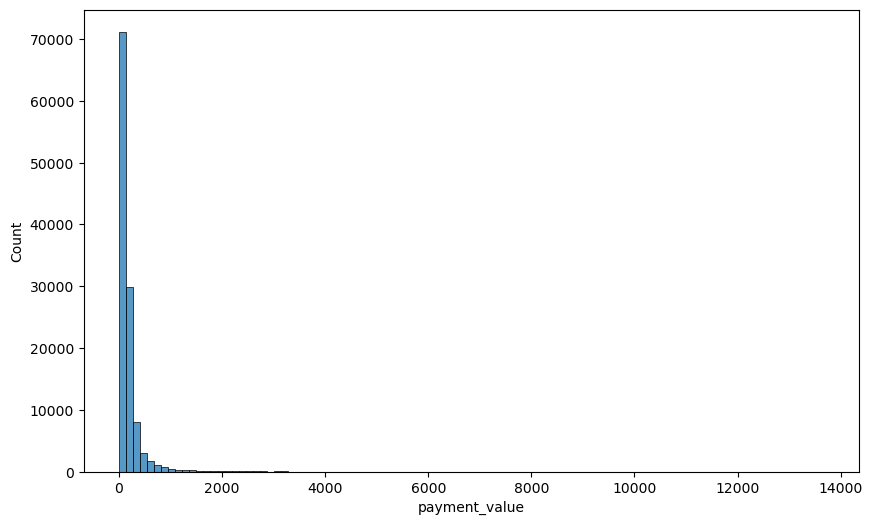

In [431]:
#Melihat apakah ada outlier
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data = sales_filtered,
             x = 'payment_value',
             bins = 100,
             ax=ax)

In [432]:
sales_filtered['payment_value'].describe()

count    117529.000000
mean        172.768202
std         267.648452
min           0.000000
25%          61.000000
50%         108.300000
75%         189.320000
max       13664.080000
Name: payment_value, dtype: float64

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

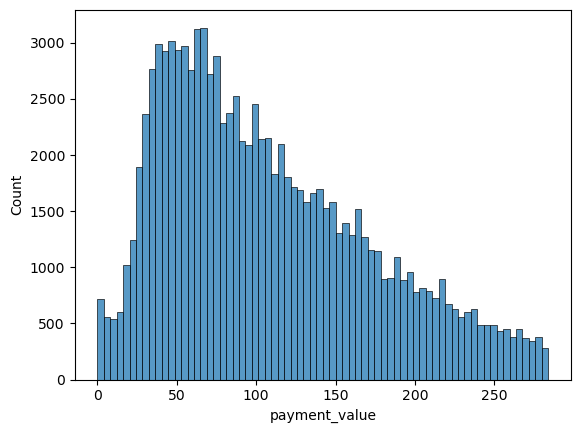

In [433]:
#Ini hasil plot jika outlier dibuang saja
batas_atas = sales_filtered['payment_value'].quantile(q=0.75) * 1.5
sales_tanpa_outlier = sales_filtered[sales_filtered['payment_value'] < batas_atas]
sns.histplot(sales_tanpa_outlier['payment_value'])

In [434]:
#Outlier dihandle dengan fixed quantile
batas_atas = sales_filtered['payment_value'].quantile(q=0.75) * 1.5
median = sales_filtered['payment_value'].median()
sales_filtered.loc[sales_filtered['payment_value'] > batas_atas, 'payment_value'] = median

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

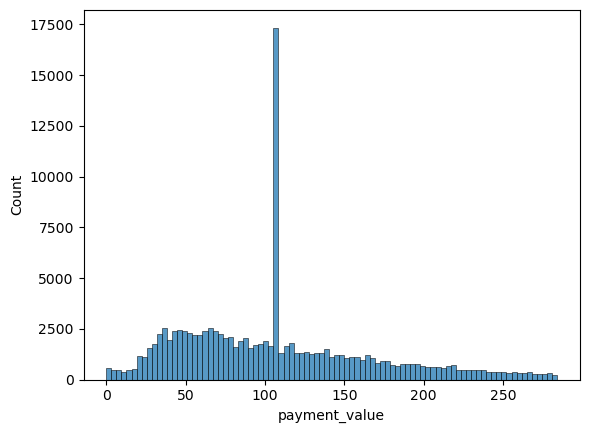

In [435]:
#Ini hasil plot setelah outlier diadjust
sns.histplot(sales_filtered['payment_value'])

In [436]:
#Cek apakah nilai max tetap sangat jauh dari q3
sales_filtered['payment_value'].describe()

count    117529.000000
mean        107.647392
std          60.665809
min           0.000000
25%          61.000000
50%         108.300000
75%         139.610000
max         283.970000
Name: payment_value, dtype: float64

<h1>1. Analisa Pertumbuhan Penjualan</h1>

In [437]:
sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117529 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      117529 non-null  object        
 1   customer_id                   117529 non-null  object        
 2   order_status                  117529 non-null  object        
 3   order_purchase_timestamp      117529 non-null  datetime64[ns]
 4   order_delivered_carrier_date  117529 non-null  datetime64[ns]
 5   payment_type                  117529 non-null  object        
 6   payment_installments          117529 non-null  int64         
 7   payment_value                 117529 non-null  float64       
 8   customer_city                 117529 non-null  object        
 9   customer_state                117529 non-null  object        
 10  order_item_id                 117529 non-null  int64         
 11  product_id   

In [438]:
#Simpan dataframe yang sudah dihandle ke sales_completed
sales_completed = sales_filtered

In [439]:
sales_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117529 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      117529 non-null  object        
 1   customer_id                   117529 non-null  object        
 2   order_status                  117529 non-null  object        
 3   order_purchase_timestamp      117529 non-null  datetime64[ns]
 4   order_delivered_carrier_date  117529 non-null  datetime64[ns]
 5   payment_type                  117529 non-null  object        
 6   payment_installments          117529 non-null  int64         
 7   payment_value                 117529 non-null  float64       
 8   customer_city                 117529 non-null  object        
 9   customer_state                117529 non-null  object        
 10  order_item_id                 117529 non-null  int64         
 11  product_id   

In [440]:
#Ekstrak tahun, bulan, dan tanggal (tanpa waktu)
sales_completed['year'] = sales_filtered['order_delivered_carrier_date'].dt.year
sales_completed['month'] = sales_filtered['order_delivered_carrier_date'].dt.month
sales_completed['date'] = sales_filtered['order_delivered_carrier_date'].dt.date

In [441]:
sales_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117529 entries, 0 to 117600
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      117529 non-null  object        
 1   customer_id                   117529 non-null  object        
 2   order_status                  117529 non-null  object        
 3   order_purchase_timestamp      117529 non-null  datetime64[ns]
 4   order_delivered_carrier_date  117529 non-null  datetime64[ns]
 5   payment_type                  117529 non-null  object        
 6   payment_installments          117529 non-null  int64         
 7   payment_value                 117529 non-null  float64       
 8   customer_city                 117529 non-null  object        
 9   customer_state                117529 non-null  object        
 10  order_item_id                 117529 non-null  int64         
 11  product_id   

In [442]:
#Mereduksi kategori menjadi "completed" dan "not completed" 
sales_completed.order_status = sales_completed.order_status.apply(lambda x: 'completed' if ('delivered' in x or
                                                                                          'invoiced' in x or
                                                                                           'shipped' in x) 
                                                                                           else 'not completed')

In [443]:
#Mengubah jumlah payment yang tidak completed menjadi 0
condition = sales_completed['order_status'] == 'not completed'
sales_completed.loc[condition, 'payment_value'] = 0

In [444]:
#not_completed jadi NaN karena akan dihitung totalnya per tahun dengan count
sales_completed.order_status = sales_completed.order_status.apply(lambda x: np.nan if 'not completed' in x else x)

In [445]:
#Dataframe berisi order_status yang dikelompokkan berdasarkan tahun dan bulan
sales_bulanan = sales_completed.groupby(['year', 'month'])['order_status'].count().reset_index()
sales_bulanan

,year,month,order_status
0,2016,10,303
1,2016,11,39
2,2016,12,2
3,2017,1,762
4,2017,2,1788
5,2017,3,3279
6,2017,4,2527
7,2017,5,4415
8,2017,6,3806
9,2017,7,4442


In [446]:
#Tanggal dibuat day = 1 karena bentuk tanggal harus yyyy-mm-dd, kemudian dimasukkan ke dataframe
sales_bulanan['tanggal'] = pd.to_datetime(sales_bulanan[['year', 'month']].assign(day=1))

In [447]:
sales_bulanan

,year,month,order_status,tanggal
0,2016,10,303,2016-10-01
1,2016,11,39,2016-11-01
2,2016,12,2,2016-12-01
3,2017,1,762,2017-01-01
4,2017,2,1788,2017-02-01
5,2017,3,3279,2017-03-01
6,2017,4,2527,2017-04-01
7,2017,5,4415,2017-05-01
8,2017,6,3806,2017-06-01
9,2017,7,4442,2017-07-01


In [448]:
#Dataframe berisi payment yang dikelompokkan berdasarkan tahun dan bulan
payment_bulanan = sales_completed.groupby(['year', 'month'])['payment_value'].sum().reset_index()
payment_bulanan

,year,month,payment_value
0,2016,10,33489.36
1,2016,11,4312.56
2,2016,12,83.01
3,2017,1,83127.84
4,2017,2,197028.33
5,2017,3,356587.65
6,2017,4,267760.23
7,2017,5,480171.43
8,2017,6,409625.72
9,2017,7,478990.40


In [449]:
#Dataframe sales_bulanan dan kolom payment_value pada dataframe payment_bulanan digabung
sales_bulanan_payment = sales_bulanan.join(payment_bulanan['payment_value'])
sales_bulanan_payment

,year,month,order_status,tanggal,payment_value
0,2016,10,303,2016-10-01,33489.36
1,2016,11,39,2016-11-01,4312.56
2,2016,12,2,2016-12-01,83.01
3,2017,1,762,2017-01-01,83127.84
4,2017,2,1788,2017-02-01,197028.33
5,2017,3,3279,2017-03-01,356587.65
6,2017,4,2527,2017-04-01,267760.23
7,2017,5,4415,2017-05-01,480171.43
8,2017,6,3806,2017-06-01,409625.72
9,2017,7,4442,2017-07-01,478990.40


In [450]:
#Membagi payment_value dengan 1000 agar nanti ditampilkan dalam skala ribuan
sales_bulanan_payment['payment_value'] = sales_bulanan_payment['payment_value']/1000
sales_bulanan_payment

,year,month,order_status,tanggal,payment_value
0,2016,10,303,2016-10-01,33.48936
1,2016,11,39,2016-11-01,4.31256
2,2016,12,2,2016-12-01,0.08301
3,2017,1,762,2017-01-01,83.12784
4,2017,2,1788,2017-02-01,197.02833
5,2017,3,3279,2017-03-01,356.58765
6,2017,4,2527,2017-04-01,267.76023
7,2017,5,4415,2017-05-01,480.17143
8,2017,6,3806,2017-06-01,409.62572
9,2017,7,4442,2017-07-01,478.99040


In [451]:
sales_bulanan_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           24 non-null     int64         
 1   month          24 non-null     int64         
 2   order_status   24 non-null     int64         
 3   tanggal        24 non-null     datetime64[ns]
 4   payment_value  24 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.1 KB


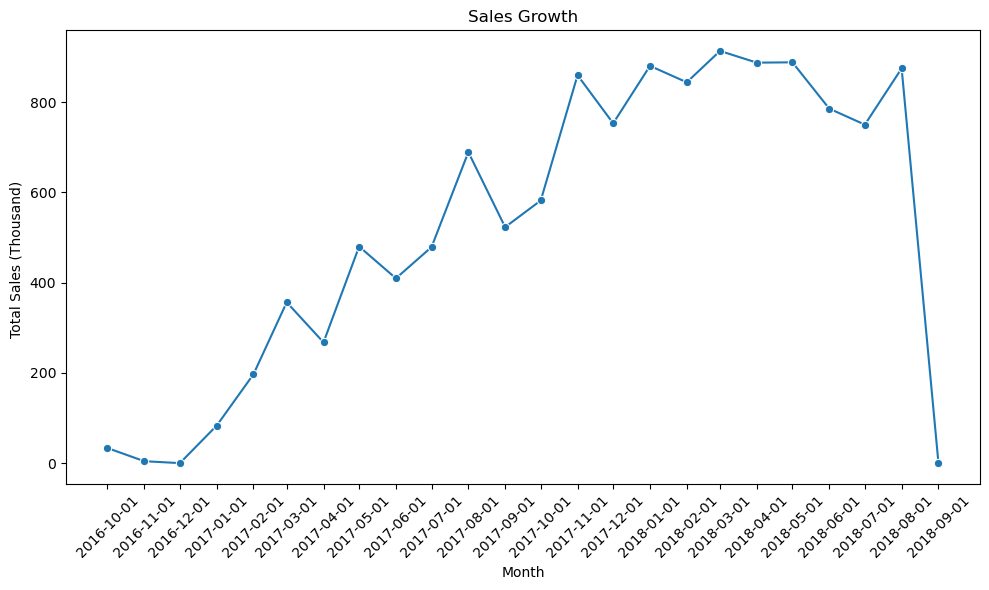

In [452]:
#Plot menampilkan pertumbuhan penjualan berdasarkan dataframe sales_bulanan_payment
plt.subplots(figsize=(10,6))
sns.lineplot(data=sales_bulanan_payment, x = 'tanggal', y = 'payment_value', marker = 'o').set_title('Sales Growth')
plt.xlabel('Month')
plt.ylabel('Total Sales (Thousand) ')
all_dates = sales_bulanan_payment['tanggal'].tolist()
plt.xticks(all_dates, rotation=45)
plt.tight_layout()
plt.show()

<h3>Analisis Sales Growth</h3>
Berdasarkan Lineplot dapat dilihat penjualan mengalami kenaikan sejak tahun 2016 dengan puncaknya pada tahun 2018 bulan 2. Setelah itu, tahun 2018 bulan 8 terlihat sales mengalami kemerosotan karena data yang terekam hanya 3 saja

<h1>2. Tren Penjualan Berdasarkan Kota</h1>

In [453]:
#Mengelompokkan total pembayaran berdasarkan kota
sales_region = sales_completed.groupby(['customer_city'])['payment_value'].sum().reset_index()
sales_region.head()

,customer_city,payment_value
0,abadia dos dourados,413.50
1,abadiania,108.30
2,abaete,1588.22
3,abaetetuba,1788.07
4,abaiara,332.15


In [454]:
#Rata rata penjualan per bulan dihitung
sales_region['avg_sales_monthly'] = sales_region['payment_value'].div(24)
sales_region.head()

,customer_city,payment_value,avg_sales_monthly
0,abadia dos dourados,413.50,17.229167
1,abadiania,108.30,4.512500
2,abaete,1588.22,66.175833
3,abaetetuba,1788.07,74.502917
4,abaiara,332.15,13.839583


In [455]:
#Mengurutkan avg_sales_monthly dari yang terbesar dan menyimpannya
sales_region_sorted = sales_region.sort_values(by='avg_sales_monthly',ascending=False)
sales_region_sorted_top10 = sales_region_sorted.head(10)
sales_region_sorted_top10

,customer_city,payment_value,avg_sales_monthly
3588,sao paulo,1824589.84,76024.576667
3147,rio de janeiro,900071.36,37502.973333
452,belo horizonte,352685.69,14695.237083
557,brasilia,273283.77,11386.823750
1141,curitiba,192754.06,8031.419167
2956,porto alegre,187072.36,7794.681667
705,campinas,171193.37,7133.057083
3239,salvador,165240.45,6885.018750
1526,guarulhos,140487.37,5853.640417
2455,niteroi,115733.78,4822.240833


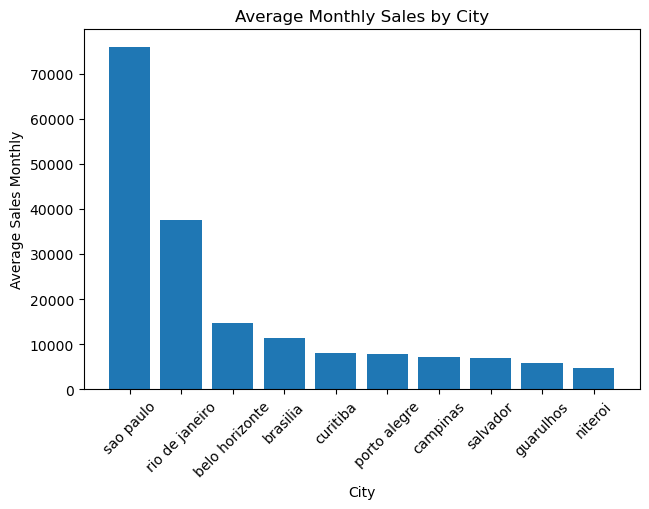

In [456]:
#Menampilkan kota dengan 10 penjualan tertinggi
x = sales_region_sorted_top10['customer_city']
y = sales_region_sorted_top10['avg_sales_monthly']
plt.bar(x, y)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Average Monthly Sales by City')
plt.ylabel('Average Sales Monthly')
plt.xlabel('City')
plt.show()

<h3> Analisa Sales by City</h3>

Terlihat bahwa rata-rata penjualan terbesar ada di kota sao paulo, kemudian disusul rio de janeiro dengan sekitar setengah dari penjualan sao paulo dan kemudian di urutan ke tiga terbesar ada di kota belo horizonte dengan penjualan kurang dari setengah penjualan di rio de janeiro.

<h1>3. Kategori Produk yang Paling Banyak Dibeli di 3 Kota Dengan Penjualan Tertinggi </h1>

In [457]:
#bikin kolum isinya 3 produk paling banyak dipakai pada 3 kota terbanyak belinya

In [458]:
#Kita buat top 3 produk untuk semua kota
#
sales_product = sales_completed.groupby(['customer_city', 'product_category_name']).size().reset_index(name='count').sort_values(['customer_city', 'count'], ascending=[1,0]).groupby('customer_city').head(3)
sales_product

,customer_city,product_category_name,count
0,abadia dos dourados,cool stuff,1
1,abadia dos dourados,esporte lazer,1
2,abadia dos dourados,livros interesse geral,1
3,abadiania,eletroportateis,1
11,abaete,relogios presentes,3
...,...,...,...
25342,ze doca,alimentos bebidas,1
25343,ze doca,bebes,1
25344,ze doca,esporte lazer,1
25347,zortea,cama mesa banho,1


In [459]:
#Kolom product_category_name dikelompokkan berdasarkan kota 
#kemudian diketahui jumlah kategori berdasarkan kota tersebut
sales_product = sales_completed.groupby(['customer_city', 'product_category_name']).size() #Size untuk melihat jumlah by city

#Rename kolom jumlah menjadi count
sales_product = sales_product.reset_index(name='count')

#Urutkan nilai count berdasarkan kota dari yang terbesar
sales_product = sales_product.sort_values(['customer_city', 'count'], ascending=[1,0])

#Kelompokkan kategori berdasarkan kota dan ambil tiga paling besar
sales_product = sales_product.groupby('customer_city').head(3)
sales_product

,customer_city,product_category_name,count
0,abadia dos dourados,cool stuff,1
1,abadia dos dourados,esporte lazer,1
2,abadia dos dourados,livros interesse geral,1
3,abadiania,eletroportateis,1
11,abaete,relogios presentes,3
...,...,...,...
25342,ze doca,alimentos bebidas,1
25343,ze doca,bebes,1
25344,ze doca,esporte lazer,1
25347,zortea,cama mesa banho,1


In [466]:
#Buat tabel berisi tiga kota dengan tiga penjualan terbesar
kota_top_3 = ['sao paulo', 'rio de janeiro', 'belo horizonte']

#Buat tabel berdasarkan kota pada variabel kota_top_3
produk_kota_top_3 = sales_product[sales_product['customer_city'].isin(kota_top_3)]

#Tabel diurutkan berdasarkan nilai count
produk_kota_top_3 = produk_kota_top_3.sort_values('count', ascending = False)
produk_kota_top_3

,customer_city,product_category_name,count
21963,sao paulo,cama mesa banho,2458
21961,sao paulo,beleza saude,1803
21982,sao paulo,esporte lazer,1453
19187,rio de janeiro,cama mesa banho,1042
19225,rio de janeiro,moveis decoracao,653
19206,rio de janeiro,esporte lazer,605
2629,belo horizonte,cama mesa banho,423
2627,belo horizonte,beleza saude,276
2655,belo horizonte,informatica acessorios,264


In [468]:
#Terjemahkan dari bahasa portugis ke bahasa inggris
df = produk_kota_top_3
df['product_category_name'] = df['product_category_name'].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))
produk_kota_top_3 = df
produk_kota_top_3

,customer_city,product_category_name,count
21963,sao paulo,bed table bath,2458
21961,sao paulo,beauty health,1803
21982,sao paulo,sport leisure,1453
19187,rio de janeiro,bed table bath,1042
19225,rio de janeiro,furniture decoration,653
19206,rio de janeiro,sport leisure,605
2629,belo horizonte,bed table bath,423
2627,belo horizonte,beauty health,276
2655,belo horizonte,computer accessories,264


In [469]:
produk_kota_top_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 21963 to 2655
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_city          9 non-null      object
 1   product_category_name  9 non-null      object
 2   count                  9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 288.0+ bytes


In [470]:
#Tabel produk_kota_top_3 dipisahkan menjadi 3 tabel berdasarkan kota
sao_paulo = produk_kota_top_3[produk_kota_top_3['customer_city'] == 'sao paulo']
rio_de_janeiro = produk_kota_top_3[produk_kota_top_3['customer_city'] == 'rio de janeiro']
belo_horizonte = produk_kota_top_3[produk_kota_top_3['customer_city'] == 'belo horizonte']

#Buat pivot tabel untuk persiapan membuat plot
sao_paulo = sao_paulo.pivot_table(index='customer_city', columns='product_category_name')
rio_de_janeiro = rio_de_janeiro.pivot_table(index='customer_city', columns='product_category_name')
belo_horizonte = belo_horizonte.pivot_table(index='customer_city', columns='product_category_name')

#Lihaat hasilnya
sao_paulo

count                             
product_category_name beauty health bed table bath sport leisure
customer_city                                                   
sao paulo                      1803           2458          1453

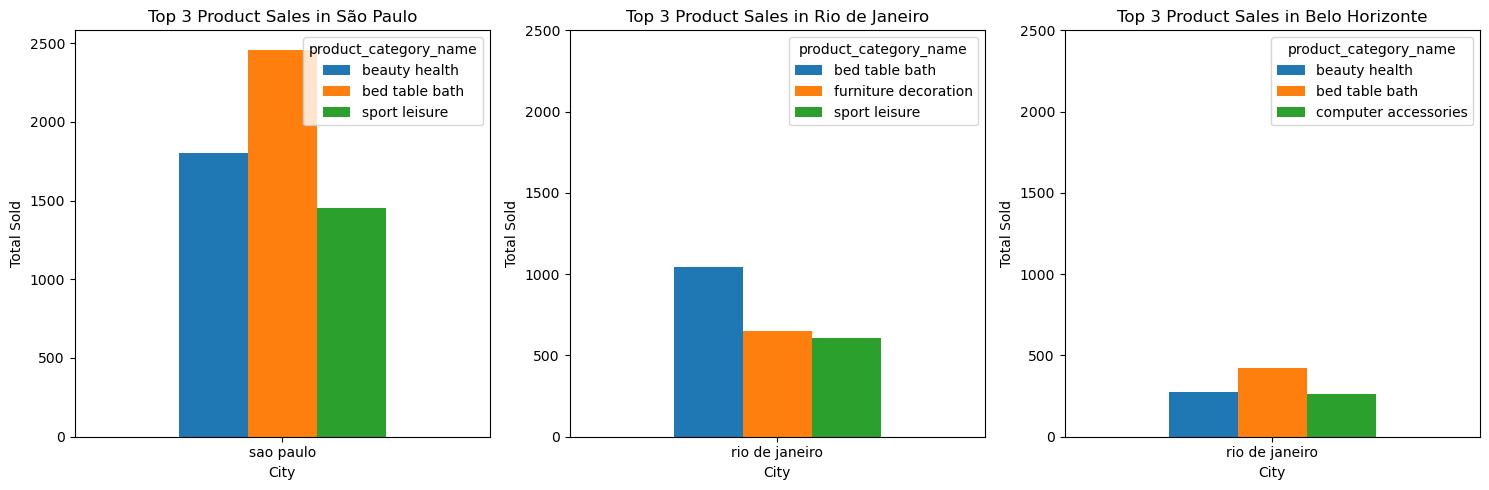

In [471]:
# Membuat subplots dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot pertama (sao_paulo)
sao_paulo.plot(kind='bar', y='count', ax=axes[0])
axes[0].set_title('Top 3 Product Sales in São Paulo')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Sold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0) #Membuat tulisan sumbu x jadi
                                                               #horizontal


# Plot kedua (rio_de_janeiro)
rio_de_janeiro.plot(kind='bar', y='count', ax=axes[1])
axes[1].set_title('Top 3 Product Sales in Rio de Janeiro')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Total Sold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0) #Membuat tulisan sumbu x jadi
                                                               #horizontal
axes[1].set_ylim(0, 2500) #Membuat batas sumbu y
                          #agar sama dengan plot pertama

# Plot ketiga (belo_horizonte)
belo_horizonte.plot(kind='bar', y='count', ax=axes[2])
axes[2].set_title('Top 3 Product Sales in Belo Horizonte')
axes[2].set_xlabel('City')
axes[2].set_ylabel('Total Sold')
axes[2].set_xticklabels(axes[1].get_xticklabels(), rotation=0)  #Membuat tulisan sumbu x jadi
                                                                #horizontal
axes[2].set_ylim(0, 2500) #Membuat batas sumbu y
                          #agar sama dengan plot pertama

# Adjust layout
plt.tight_layout()
plt.show()


<h3>Analisis Kategori Produk</h3>
Pada grafik pertama dapat dilihat bahwa kota sao paulo memiliki pembelian terbanyak berupa kategori bed table bath, beauty health, dan sport leisure. 
Pada grafik kedua dapat dilihat bahwa kota rio de janeiro memiliki pembelian terbanyak berupa bed table bath, furniture decoration, dan sport leisure
Pada grafik ketiga dapat dilihat bahwa kota belo horizonte memiliki pembelian terbanyak berupa bed table bath, beauty health, dan computer accessories.
Berdasarkan informasi tersebut, hal-hal yang dapat dilakukan untuk meningkatkan pertumbuhan penjualan adalah dengan memporomosikan barang-barang tersebut pada masing-masing kota.